In [4]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), '../'))
from pprint import pprint
from dataset.data_loader import DataLoader, playtime_forever_users_games_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer
from utils.utils import get_game_name_and_scores

from models.ncf_model import NCFModel

Before 0.5744286179542542


,id,name,score
0,252490,Rust,0.245462
1,381210,Dead by Daylight,0.244838
2,1245620,ELDEN RING,0.244776
3,1086940,Baldur's Gate 3,0.244089
4,346110,ARK: Survival Evolved,0.243998
5,1172470,Apex Legends™,0.243977
6,227300,Euro Truck Simulator 2,0.243538
7,739630,Phasmophobia,0.243359
8,548430,Deep Rock Galactic,0.243312
9,1174180,Red Dead Redemption 2,0.243194


,id,name,score
0,1550270,Togges,0.237742
1,1226000,Nations At War Digital Core Game,0.237726
2,1276610,My Cute Roommate,0.237723
3,1882280,Forgotten Realms: The Archives - Collection Two,0.237718
4,1597730,Dogs Organized Neatly,0.237667
5,705250,Cross Set Infinity,0.237656
6,1067350,Sophie's Dice,0.237624
7,2090150,Furry Sex: Poker 🃏♥️,0.237623
8,1643180,Artist Life Simulator,0.237572
9,777650,Yet Another Research Dog,0.237517


After 0.5744286179542542
Fine Tuned User Output
0.8793486952781677


,id,name,score
0,1617480,Fight Party,0.927530
1,582010,Monster Hunter: World,0.882542
2,619740,The Inevitability,0.849841
3,415300,Monster Monpiece,0.844483
4,940980,Phantasmat: The Dread of Oakville Collector's ...,0.829312
5,407980,Sakura Beach 2,0.824071
6,657040,The Myth Seekers: The Legacy of Vulcan,0.820042
7,552900,Fields XY,0.816118
8,200710,Torchlight II,0.815980
9,222940,THE KING OF FIGHTERS XIII STEAM EDITION,0.811059


,id,name,score
0,1332450,Open The Gates!,0.355562
1,1258460,Escape First 3,0.355469
2,1641060,Castles & Catapults,0.354220
3,1246250,An Airport for Aliens Currently Run by Dogs,0.353008
4,418260,Gumball Drift,0.349316
5,1838820,Life of a Space Force Captain,0.348215
6,395960,عالم أريب,0.343080
7,575690,PARKAN: THE IMPERIAL CHRONICLES,0.339020
8,778860,Animals Memory: Insect,0.336209
9,693800,Loco Parentis / 孤女咒怨,0.328324


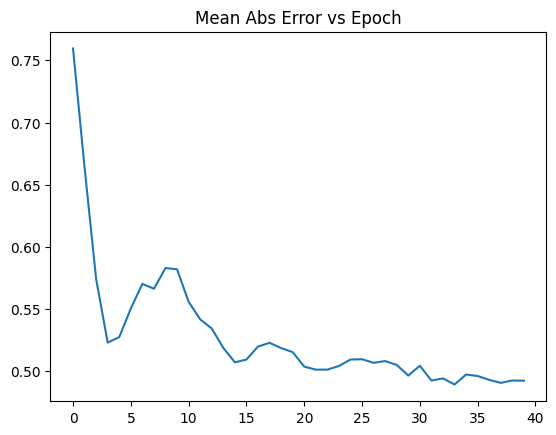

In [5]:
# Test Fine Tuning
# data_loader = DataLoader.load_from_file('test_ncf_data_loader', use_published_models_path=True, load_live_data_loader=True)
data_loader = DataLoader.load_from_file('test_evaluation_data_loader_embed_all_except_tags', use_published_models_path=False, load_live_data_loader=True)
model = NCFModel()
# model.load('evaluation_test_ncf_low_weight_decay', load_published_model=True)
model.load('evaluation_test_gcf_embed_all_except_tags', load_published_model=False)
model.new_seed(None)
model.fine_tune_num_epochs = 40
model.fine_tune_weight_decay = 1e-6#1e-3
model.fine_tune_learning_rate = 1e-2
model.set_data_loader(data_loader)
user_to_fine_tune = 76561198103368250 # 76561198166465514 # 76561198835352289 #  #  #  # 
print('Before', model.get_score_between_user_and_game(76561198880605436, 367520))
model.ncf.add_new_user()
model.user_to_index[user_to_fine_tune] = len(model.user_nodes)
model.user_nodes.append(user_to_fine_tune)
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(user_to_fine_tune)[:10]))
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(user_to_fine_tune)[-10:]))
model.fine_tune(user_to_fine_tune)
print('After', model.get_score_between_user_and_game(76561198880605436, 367520))
print('Fine Tuned User Output')
print(model.get_score_between_user_and_game(user_to_fine_tune, 367520))
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(user_to_fine_tune)[:10]))
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(user_to_fine_tune)[-10:]))

In [14]:
# data_loader = DataLoader(cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, score_normalizers = [GaussianNormalizer(1.0, 1.0)], user_game_edge_embeddings = ['playtime_forever'], game_embeddings=['name'])
data_loader = DataLoader(cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)], game_embeddings=['numReviews', 'avgReviewScore', 'price', 'numFollowers'])
data_loader.load_random_edge_train_test_split(train_percentage=0.9, test_percentage=0.1, seed=0)
data_loader.save_data_loader_parameters('test_ncf_data_loader', overwrite=True)

In [22]:
# base collaborative filter test
save_file_name = 'test_cf_model'
cf_model = NCFModel(num_epochs = 0, embedding_size = 48, batch_percent = 0.1, learning_rate = 1e-2, weight_decay=1e-6, mlp_hidden_layer_sizes = [], seed=0, model_type='cf', fine_tune_num_epochs=1, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-5, save_file_name=save_file_name, nn_save_name='best')
cf_model.set_data_loader(data_loader)
cf_model.train(debug=True)
cf_model.save(save_file_name, overwrite=True)
print(cf_model.get_score_between_user_and_game(76561198835352289, 967050))
print(cf_model.get_score_between_user_and_game(76561198835352289, 578080))
print(cf_model.get_scores_between_users_and_games([76561198835352289, 76561198835352289], [967050, 578080]))
display(get_game_name_and_scores(data_loader, cf_model.score_and_predict_n_games_for_user(76561198835352289)[:10]))
display(get_game_name_and_scores(data_loader, cf_model.score_and_predict_n_games_for_user(76561198835352289)[-10:]))

Known Game Embeddings:  ['avg_review_score', 'price', 'num_followers', 'num_reviews']


KeyboardInterrupt: 

Known Game Embeddings:  ['avg_review_score', 'price', 'num_followers', 'num_reviews']
Total Learnable Parameters: 5533799


Training: 0it [00:00, ?it/s]


-0.28598809242248535
-1.2902723550796509
[-0.28598809242248535, -1.2902723550796509]


KeyError: "['name'] not in index"

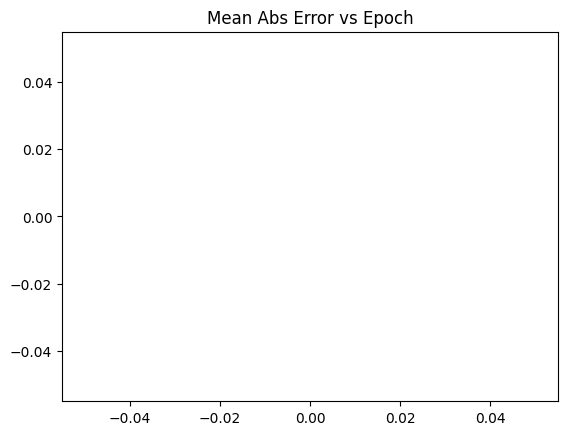

In [ ]:
# generalized collaborative filter test
save_file_name = 'test_gcf_model'
gcf_model = NCFModel(num_epochs = 0, embedding_size = 48, batch_percent = 0.1, learning_rate = 1e-2, weight_decay=1e-6, mlp_hidden_layer_sizes = [], seed=0, model_type='gcf', fine_tune_num_epochs=1, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-5, save_file_name=save_file_name, nn_save_name='best')
gcf_model.set_data_loader(data_loader)
gcf_model.train(debug=True)
gcf_model.save(save_file_name, overwrite=True)
print(gcf_model.get_score_between_user_and_game(76561198835352289, 967050))
print(gcf_model.get_score_between_user_and_game(76561198835352289, 578080))
print(gcf_model.get_scores_between_users_and_games([76561198835352289, 76561198835352289], [967050, 578080]))
display(get_game_name_and_scores(data_loader, gcf_model.score_and_predict_n_games_for_user(76561198835352289)[:10]))
display(get_game_name_and_scores(data_loader, gcf_model.score_and_predict_n_games_for_user(76561198835352289)[-10:]))

Known Game Embeddings:  ['avg_review_score', 'price', 'num_followers', 'num_reviews']
Total Learnable Parameters: 5828821


Training: 0it [00:00, ?it/s]


0.021566499024629593
0.2357025444507599
[0.021566499024629593, 0.2357025444507599]


KeyError: "['name'] not in index"

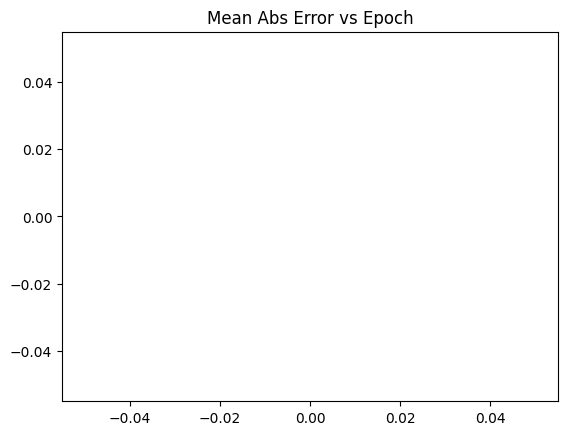

In [ ]:
# mlp test
save_file_name = 'test_mlp_model'
mlp_model = NCFModel(num_epochs = 0, embedding_size = 50, batch_percent = 0.1, learning_rate = 1e-2, weight_decay=1e-6, mlp_hidden_layer_sizes = [256, 256, 256], seed=0, model_type='mlp', fine_tune_num_epochs=1, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-5, save_file_name=save_file_name, nn_save_name='best')
mlp_model.set_data_loader(data_loader)
mlp_model.train(debug=True)
mlp_model.save(save_file_name, overwrite=True)
print(mlp_model.get_score_between_user_and_game(76561198835352289, 967050))
print(mlp_model.get_score_between_user_and_game(76561198835352289, 578080))
print(mlp_model.get_scores_between_users_and_games([76561198835352289, 76561198835352289], [967050, 578080]))
display(get_game_name_and_scores(data_loader, mlp_model.score_and_predict_n_games_for_user(76561198835352289)[:10]))
display(get_game_name_and_scores(data_loader, mlp_model.score_and_predict_n_games_for_user(76561198835352289)[-10:]))

Known Game Embeddings:  ['avg_review_score', 'price', 'num_followers', 'num_reviews']
Total Learnable Parameters: 5905989


Training: 0it [00:00, ?it/s]


0.09586231410503387
-0.007838565856218338
[0.09586232900619507, -0.007838677614927292]


KeyError: "['name'] not in index"

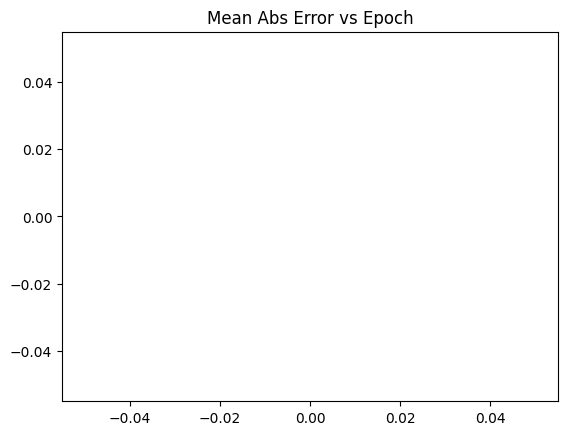

In [23]:
# ncf test
save_file_name = 'test_ncf_model'
ncf_model = NCFModel(num_epochs = 0, embedding_size = 24, batch_percent = 0.1, learning_rate = 1e-2, weight_decay=1e-6, mlp_hidden_layer_sizes = [256, 256, 256], seed=0, model_type='ncf', fine_tune_num_epochs=1, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-5, save_file_name=save_file_name, nn_save_name='best')
ncf_model.set_data_loader(data_loader)
ncf_model.train(debug=True)
ncf_model.save(save_file_name, overwrite=True)
print(ncf_model.get_score_between_user_and_game(76561198835352289, 967050))
print(ncf_model.get_score_between_user_and_game(76561198835352289, 578080))
print(ncf_model.get_scores_between_users_and_games([76561198835352289, 76561198835352289], [967050, 578080]))
display(get_game_name_and_scores(data_loader, ncf_model.score_and_predict_n_games_for_user(76561198835352289)[:10]))
display(get_game_name_and_scores(data_loader, ncf_model.score_and_predict_n_games_for_user(76561198835352289)[-10:]))

In [19]:
# data_loader = DataLoader.load_from_file('test_evaluation_data_loader_embed_all_except_tags', use_published_models_path=False, load_live_data_loader=True)
model = NCFModel()
model.load('evaluation_test_cf_embed_all_except_tags', load_published_model=False)
model.set_data_loader(data_loader)

In [20]:
# test_user = 76561199048589805 # Only 1 game
test_user = 76561198835352289 # Only 4 games
# test_user = 76561198880605436 # ~20 games
# test_user = 76561199040442492 # ~400 games
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(test_user)[:10]))
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(test_user)[-10:]))

,id,name,score
0,730,Counter-Strike 2,18.405355
1,578080,PUBG: BATTLEGROUNDS,2.224962
2,255300,Journey of a Roach,1.166963
3,807870,Survival Planet,0.912673
4,547750,Endless Night - Alpha,0.883770
5,105600,Terraria,0.815917
6,1102930,KoboldKare,0.800910
7,271590,Grand Theft Auto V,0.783287
8,359550,Tom Clancy's Rainbow Six® Siege,0.775178
9,346040,Joe's Diner,0.764509


,id,name,score
0,859570,Secret Neighbor: Hello Neighbor Multiplayer,-0.541062
1,465750,Tank Battle: North Africa,-0.544836
2,881560,How To Date A Magical Girl!,-0.547474
3,367050,Vindicator: Uprising,-0.572535
4,294100,RimWorld,-0.580842
5,589530,Hakuoki: Kyoto Winds,-0.643089
6,874390,The Battle of Polytopia,-0.898006
7,849680,TimeTekker,-0.942607
8,548430,Deep Rock Galactic,-2.608478
9,218620,PAYDAY 2,-14.167975
